[[  0.00000000e+00   0.00000000e+00   1.55000000e+07   2.30000000e+16]
 [  1.65656920e+23   5.70015445e+20   1.54997828e+07   2.29990705e+16]
 [  1.32519213e+24   4.55898962e+21   1.54991311e+07   2.29962821e+16]
 ..., 
 [  3.47438069e+30   8.66494617e+26   1.15715795e+07   8.65915985e+13]
 [  3.47674302e+30   8.66505114e+26   1.15715781e+07   8.64043283e+13]
 [  3.47910468e+30   8.66515583e+26   1.15715768e+07   8.62177324e+13]]


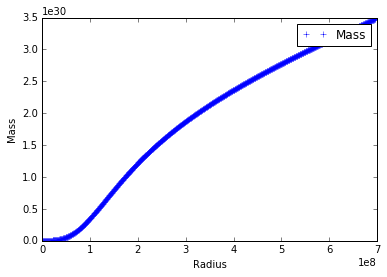

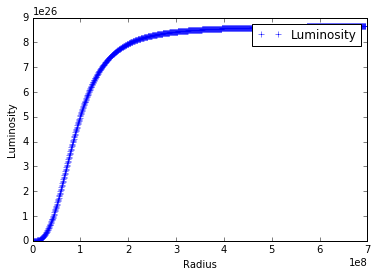

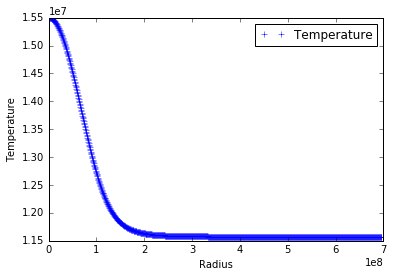

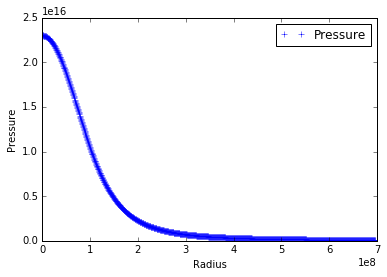

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

a = 7.565e-16
c = 3.0e8
G = 6.67408e-11 

M = 0.
L = 0.

T = 15.5e6
P = 2.3e16
Kb = 1.38e-23

X = .63 #hydrogen number density
Y = .35 #helium
Z = .02 #metals

Xhi_H = .64
Xhi_CNO = .014

gbf = 1.0
gff = 1.9
guil = 10.0

mu = 1.0/(((2*X) + (3./4.0)*Y) + ((1./2.)*Z))
Mass_of_Hyd = 1.67e-27

radius_sun = 6.957e8
luminosity_sun = 3.846e26
mass_sun = 2.0e30

e_pp = 1.08e-12
e_cno = 8.24e-31

def rho(y):    
    Mr, Lr, T, P = y
    return(P - (a*np.power(T,4.0)/3.0))*((mu*Mass_of_Hyd)/(Kb*T))

def kappa(y):
    Mr, Lr, T, P = y
    rho_0 = rho(y)
    kappa_bf = (4.34e21)*(gbf/guil)*Z*(1.0+X) *(rho_0/np.power(T,3.5))
    kappa_ff = (3.68e18)*(1.0-Z)*(1.0+X)*(rho_0/np.power(T,3.5))
    k_e = .02 * (1.0+X)
    return ((kappa_bf+kappa_ff+k_e)/3.0)
        
def epsilon(y):
    Mr, Lr, T, P = y
    rho_0 = rho(y)
    Epsilon_pp = (e_pp)*rho_0*np.power(Xhi_H,2.0)*np.power((T/10e5),4.0)
    Epsilon_cno = (e_cno)*rho_0*.64*.015*np.power((T/10e5),19.9)
    return Epsilon_pp + Epsilon_cno

def dMdr(y,r):
    Mr, Lr, T, P = y
    rho_0 = rho(y)
    dmdr_0 = 4.0 * np.pi * np.power(r,2.0) * rho_0
    return dmdr_0

def dLdr(y,r):
    Mr, Lr, T, P = y
    Ldr0 = 4.0*np.pi*np.power(r,2.0)*rho(y)*epsilon(y)
    return Ldr0

def Temperature(y,r):
    Mr, Lr, T, P = y
    rho_0 = rho(y)
    kappa_0 = kappa(y)
    return -(3.0/(4.0*a*c))*(kappa_0*rho_0/np.power(T,3.0))*(Lr/(4.0*np.pi*np.power(r,2.0)))
   
def Pressure(y,r):
    Mr, Lr, T, P = y
    Pressure0 = -(G*Mr*rho(y))/np.power(r,2.0)
    return Pressure0


def derivatives(y,r):
    Mr, Lr, T, P = y
    derivs = [dMdr(y,r), dLdr(y,r), Temperature(y,r), Pressure(y,r)]
    return derivs

y0 = [M, L, T, P]



r = np.linspace(0.1, 6.957e8, 1000)
psoln = odeint(derivatives, y0, r)

print psoln

plt.plot(r, psoln[:,0], "+", label="Mass")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.legend();

plt.show()

plt.plot(r, psoln[:,1], "+", label="Luminosity")
plt.xlabel("Radius")
plt.ylabel("Luminosity")
plt.legend();

plt.show()

plt.plot(r, psoln[:,2], "+", label="Temperature")
plt.xlabel("Radius")
plt.ylabel("Temperature")
plt.legend();

plt.show()

plt.plot(r, psoln[:,3], "+", label="Pressure")
plt.xlabel("Radius")
plt.ylabel("Pressure")
plt.legend();
